In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from Qommunity.samplers.hierarchical.advantage_sampler import AdvantageSampler
from Qommunity.searchers.hierarchical_searcher import HierarchicalSearcher

In [2]:
G = nx.powerlaw_cluster_graph(n=100, m=1, p=0.1)
num_reads = 100
version = ""
region = "na-west-1"

### Clique embedding

In [3]:
clique_samples = np.load("adv_clique_samples.npy", allow_pickle=True)

In [5]:
problem_sizes = np.array([len(sample.probabilities) for sample in clique_samples])
find_clique_emb_times = np.array([
    sample.sampleset_info.time_measurements.find_clique_embedding_time.item()
    for sample in clique_samples
])
sample_function_times = np.array([
    sample.sampleset_info.time_measurements.sample_time.item() for sample in clique_samples
])
qpu_access_times = np.array([
    sample.sampleset_info.dwave_sampleset_info.qpu_access_time.item() for sample in clique_samples
])

In [6]:
print("Pr. size\tFind cl. emb. time\tSample fun. time\tQPU acc time")
digits = 4
for pr_size, f_cl_emb_t, sample_fun_t, qpu_acc_t in zip(problem_sizes, find_clique_emb_times, sample_function_times, qpu_access_times):
    f_cl_emb_t = round(f_cl_emb_t, digits)
    sample_fun_t = round(sample_fun_t, digits)
    print(pr_size, "\t\t", f_cl_emb_t, "\t\t", sample_fun_t, "\t\t", qpu_acc_t)
    print()

Pr. size	Find cl. emb. time	Sample fun. time	QPU acc time
100 		 0.2028 		 0.1012 		 39837.56

82 		 0.1656 		 0.055 		 29477.16

63 		 0.3067 		 0.0361 		 36488.76

6 		 0.1402 		 0.0258 		 28174.36

54 		 0.1626 		 0.0246 		 36055.96

2 		 0.1254 		 0.0188 		 26389.16

30 		 0.1439 		 0.0202 		 35576.76

2 		 0.1382 		 0.0214 		 26389.16

17 		 0.1182 		 0.0195 		 33009.16

27 		 0.1261 		 0.0251 		 36056.36

20 		 0.129 		 0.0218 		 28393.56

2 		 0.1191 		 0.0179 		 22365.16

5 		 0.1274 		 0.0184 		 28421.56

9 		 0.1219 		 0.0214 		 33009.16

83 		 0.125 		 0.0357 		 29363.96

19 		 0.1214 		 0.0229 		 36056.76

7 		 0.128 		 0.0215 		 28421.56

17 		 0.1144 		 0.0217 		 33009.16

66 		 0.1612 		 0.032 		 36578.76

31 		 0.173 		 0.0322 		 35667.16

2 		 0.1177 		 0.0204 		 26389.96

24 		 0.1276 		 0.0206 		 33009.16

7 		 0.1136 		 0.0188 		 28421.56

3 		 0.1338 		 0.0199 		 28173.56

4 		 0.2366 		 0.0237 		 28129.56



In [108]:
print(f"Sum of qpu_access_time [milisec]: {qpu_access_times.sum() / 1000}")
print(f"Sum of sample function time[sec]: {sample_function_times.sum()}")
print(f"Sum of find_clique_embedding_time [sec]: {find_clique_emb_times.sum()}")

Sum of qpu_access_time [milisec]: 782.8650000000001
Sum of sample function time[sec]: 0.6967371000209823
Sum of find_clique_embedding_time [sec]: 3.6793135999614606


Text(0.5, 1.0, 'Qpu access time [microsec.] in function of subproblems sizes')

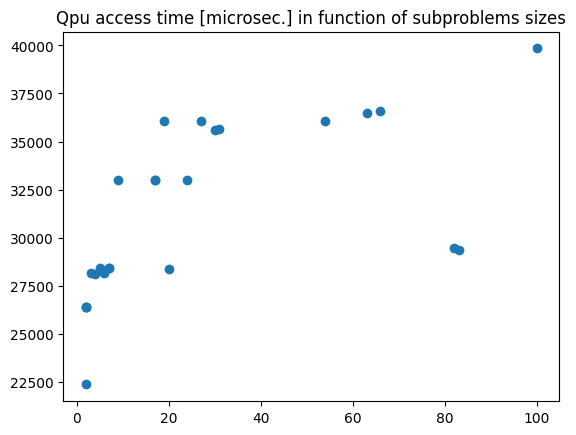

In [110]:
plt.scatter(problem_sizes, qpu_access_times)
plt.title("Qpu access time [microsec.] in function of subproblems sizes")

### Standard embedding

In [8]:
results_2 = np.load("adv_heuristic_samples.npy", allow_pickle=True)

In [7]:
results_2

NameError: name 'results_2' is not defined

In [144]:
print(f"Modularity: {nx.community.modularity(G, res_2)}")

Modularity: 0.7753290480563209


In [153]:
heuristic_samples = np.load("adv_heuristic_samples.npy", allow_pickle=True)

In [156]:
dwave_sampleset_infos_bin_divs = []
time_measurements_bin_divs = []

for i, bin_division_info in enumerate(heuristic_samples):
    dwave_sampleset_info = bin_division_info.sampleset_info.dwave_sampleset_info
    time_measurements = bin_division_info.sampleset_info.time_measurements

    dwave_sampleset_infos_bin_divs.append(dwave_sampleset_info)
    time_measurements_bin_divs.append(time_measurements)

dwave_sampleset_infos_bin_divs = np.array(dwave_sampleset_infos_bin_divs)
time_measurements_bin_divs = np.array(time_measurements_bin_divs, dtype=object)

In [157]:
qpu_access_times_bin_divs = [sampleset_info_bin_div.qpu_access_time for sampleset_info_bin_div in dwave_sampleset_infos_bin_divs]
qpu_access_times_bin_divs = np.array(qpu_access_times_bin_divs)

In [160]:
find_cl_emb_times_bin_divs = [time_measurement_bin_div.embedding_composite_time for time_measurement_bin_div in time_measurements_bin_divs]
find_cl_emb_times_bin_divs = np.array(find_cl_emb_times_bin_divs)

In [161]:
find_cl_emb_times_bin_divs

array([0.1642958, 0.3838448, 0.3040314, 0.1602076, 0.1363965, 0.1938292,
       0.1488705, 0.2039151, 0.1787988, 0.1370614, 0.2252161, 0.250537 ,
       0.3414739, 0.3920772, 0.3989622, 0.4424   , 0.4206153, 0.4032024,
       0.3828209, 0.4501384, 0.4729854, 0.4201932, 0.4083212, 0.4103401,
       0.4097706])

In [172]:
problem_sizes = np.array([len(sample.probabilities) for sample in heuristic_samples])
sample_function_times = np.array([
    sample.sampleset_info.time_measurements.sample_time.item() for sample in heuristic_samples
])
qpu_access_times = np.array([
    sample.sampleset_info.dwave_sampleset_info.qpu_access_time.item() for sample in heuristic_samples
])

In [173]:
print(f"Sum of qpu_access_time [milisec]: {qpu_access_times.sum() / 1000}")
print(f"Sum of sample function time[sec]: {sample_function_times.sum()}")

Sum of qpu_access_time [milisec]: 716.3022
Sum of sample function time[sec]: 250.61090379998495


Text(0.5, 1.0, 'Qpu access time [microsec.] in function of subproblems sizes')

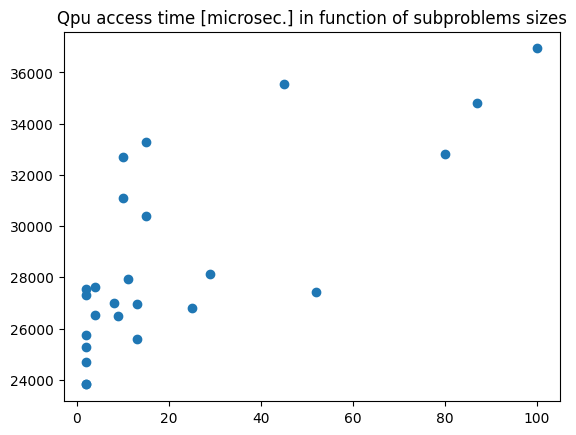

In [174]:
plt.scatter(problem_sizes, qpu_access_times)
plt.title("Qpu access time [microsec.] in function of subproblems sizes")

In [16]:
results_2[0].probabilities

rec.array([(0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0.01, -46.41919192),
           (0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0.01, -45.49494949),
           (0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0.01, -45.09090909),
 

In [51]:
results_2

array([SolverResult(probabilities=rec.array([(0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0.01, -46.41919192),
                  (0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0.01, -45.49494949),
                  (0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1